In [3]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import stats

import seaborn as sns
import matplotlib.colors as mcolors

from bin import load_bgi as ld

In [4]:
bdata_100 = sc.read_h5ad("gRNA/B926/D03658A6.tissue.guide.h5")

In [5]:
bdata_100

AnnData object with n_obs × n_vars = 23088 × 27957
    obsm: 'spatial'

In [6]:
bdata_20 = sc.read_h5ad("RNA/B926-1.expr.bin_20.annotation.h5")

In [7]:
bdata_20

AnnData object with n_obs × n_vars = 568003 × 27798
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt1', 'pct_counts_mt1', 'total_counts_mt2', 'pct_counts_mt2', 'total_counts_rb', 'pct_counts_rb', 'annotations'
    var: 'mt1', 'mt2', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'rank_genes_groups'
    obsm: 'spatial'
    layers: 'counts'

In [8]:
bdata_20[bdata_20.obs["annotations"].str.endswith("T")]

View of AnnData object with n_obs × n_vars = 41821 × 27798
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt1', 'pct_counts_mt1', 'total_counts_mt2', 'pct_counts_mt2', 'total_counts_rb', 'pct_counts_rb', 'annotations'
    var: 'mt1', 'mt2', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'rank_genes_groups'
    obsm: 'spatial'
    layers: 'counts'

In [9]:
guide_genes = bdata_20.var_names.str.startswith("sg")
gdata_20 = bdata_20[:, guide_genes]
bdata_20[gdata_20.X.sum(axis=1) > 0]

View of AnnData object with n_obs × n_vars = 34342 × 27798
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt1', 'pct_counts_mt1', 'total_counts_mt2', 'pct_counts_mt2', 'total_counts_rb', 'pct_counts_rb', 'annotations'
    var: 'mt1', 'mt2', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'rank_genes_groups'
    obsm: 'spatial'
    layers: 'counts'

In [10]:
filt_data20 = bdata_20[(gdata_20.X.sum(axis=1) > 0).T[0] & bdata_20.obs["annotations"].str.endswith("T").tolist(), guide_genes]
filt_data20

View of AnnData object with n_obs × n_vars = 2770 × 68
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt1', 'pct_counts_mt1', 'total_counts_mt2', 'pct_counts_mt2', 'total_counts_rb', 'pct_counts_rb', 'annotations'
    var: 'mt1', 'mt2', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'rank_genes_groups'
    obsm: 'spatial'
    layers: 'counts'

In [11]:
sgs = filt_data20.var_names.str.split('_', n=1).str[0]
sgs_grouped = pd.DataFrame(filt_data20.X.toarray(), columns=filt_data20.var_names)
sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()
sgdata = ad.AnnData(sgs_grouped, obs=filt_data20.obs, var=pd.DataFrame(index=sgs_grouped.columns))
sgdata.obsm['spatial'] = filt_data20.obsm['spatial']
filt_data20 = sgdata.copy()

In [12]:
filt_data20.obs["guide"] = filt_data20.var_names[np.argmax(filt_data20.X, axis=1)]

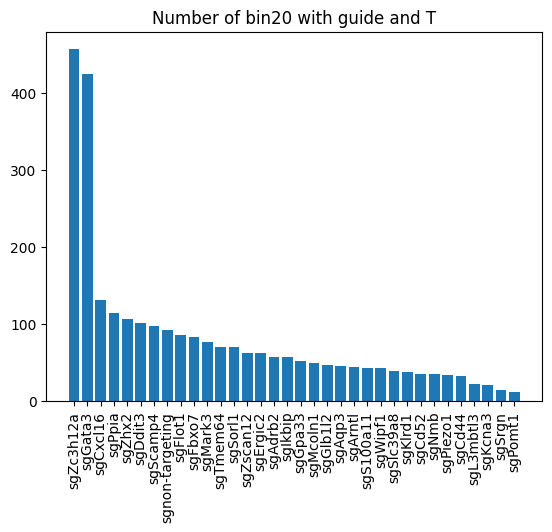

In [13]:
a = filt_data20.obs["guide"].value_counts()
plt.title("Number of bin20 with guide and T")
plt.bar(x = a.index, height=a)
plt.xticks(rotation=90)
plt.show()

In [14]:
filt_data20.obs[["annotations", "guide"]]

,annotations,guide
32406,effector T,sgScamp4
274326,Unknown T,sgZhx2
191908,effector T,sgGata3
213437,Unknown T,sgGata3
101451,exhausted T,sgZc3h12a
...,...,...
278711,Unknown T,sgZscan12
637667,Unknown T,sgErgic2
379670,Unknown T,sgGata3
481138,memory T,sgScamp4


In [35]:
count_df = filt_data20.obs[["annotations", "guide"]].groupby("guide").value_counts()

In [36]:
t_types = np.unique(filt_data20.obs["annotations"])

In [37]:
count_df = pd.DataFrame(np.array([count_df[:, t_type].tolist() for t_type in t_types]), columns=filt_data20.var_names, index=t_types).T
count_df

,Unknown T,effector T,exhausted T,memory T,stem-like T
sgAdrb2,25,16,4,7,6
sgAqp3,17,19,4,6,0
sgArntl,23,11,0,6,5
sgCd44,12,12,0,6,3
sgCd52,22,8,0,4,2
sgCxcl16,61,42,6,15,8
sgDdit3,39,35,7,13,8
sgErgic2,27,23,3,8,2
sgFbxo7,40,28,6,9,1
sgFlot1,36,29,8,12,1


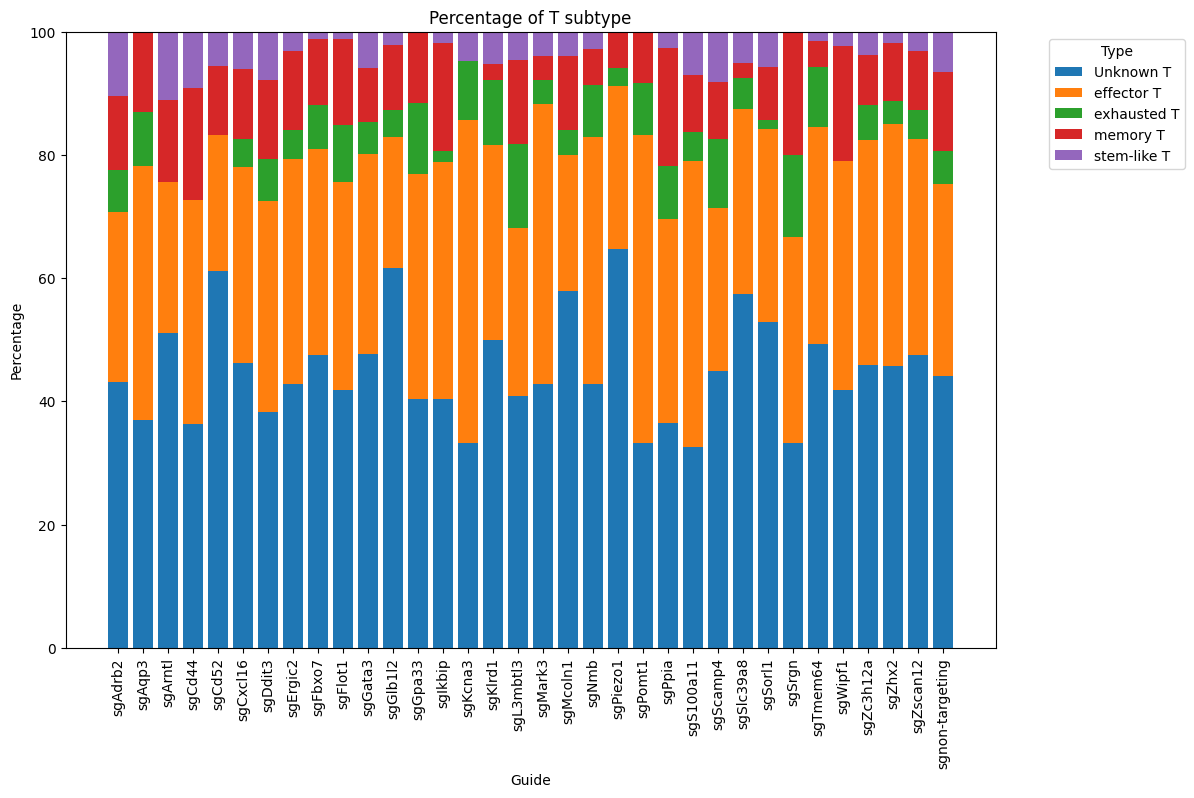

In [19]:
guide_percentage = count_df.div(count_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))

bottom = np.zeros(len(guide_percentage))

for column in guide_percentage.columns:
    plt.bar(guide_percentage.index, guide_percentage[column], bottom=bottom, label=column)
    bottom += guide_percentage[column]

plt.xlabel('Guide')
plt.ylabel('Percentage')
plt.title('Percentage of T subtype')
plt.xticks(rotation=90)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
clean_df = count_df.iloc[:, 1:]

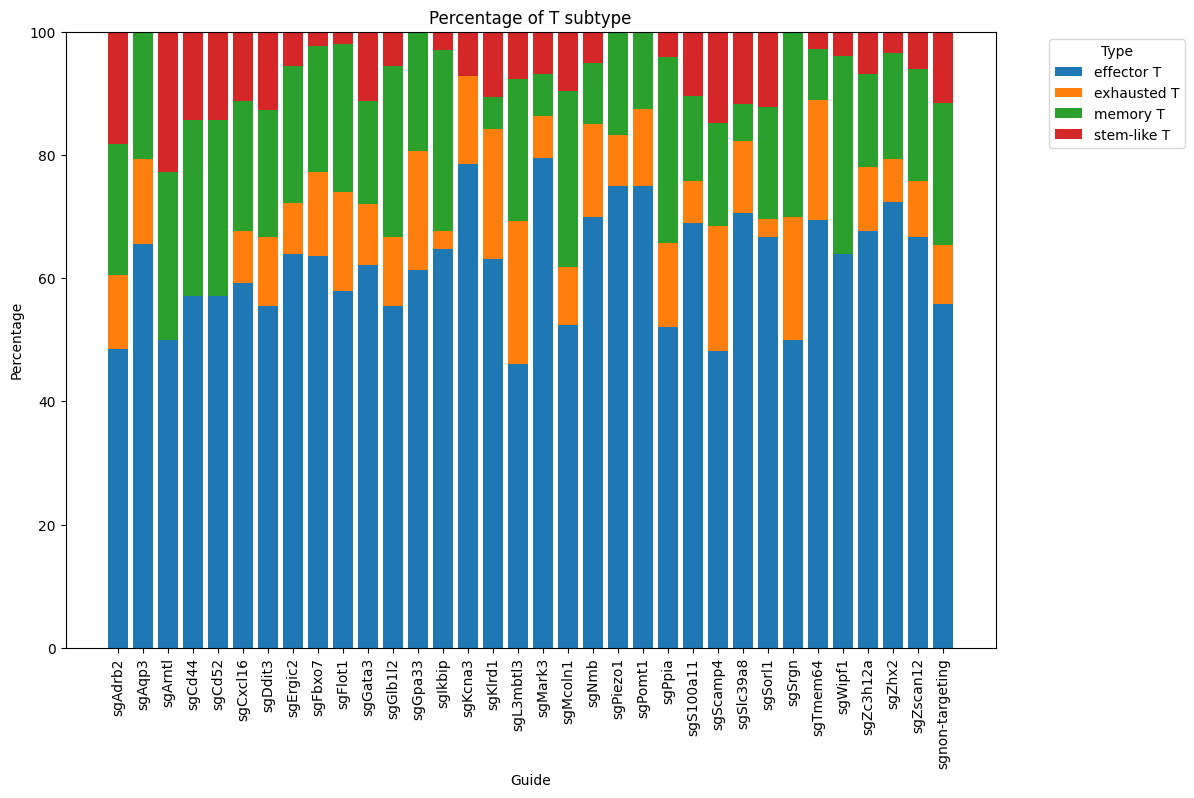

In [21]:
guide_percentage = clean_df.div(clean_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))

bottom = np.zeros(len(guide_percentage))

for column in guide_percentage.columns:
    plt.bar(guide_percentage.index, guide_percentage[column], bottom=bottom, label=column)
    bottom += guide_percentage[column]

plt.xlabel('Guide')
plt.ylabel('Percentage')
plt.title('Percentage of T subtype')
plt.xticks(rotation=90)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

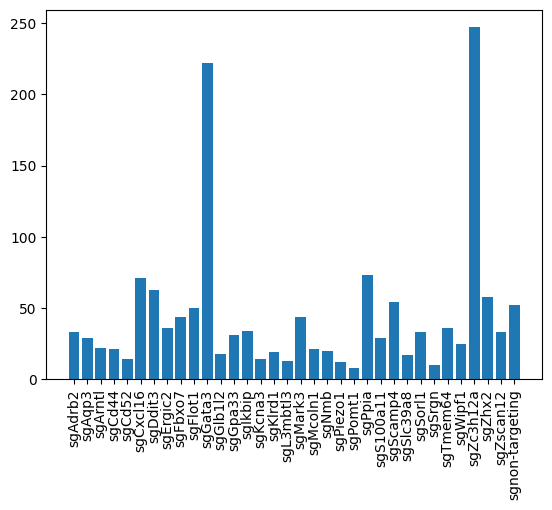

In [40]:
plt.bar(height=clean_df.sum(axis=1).tolist(), x=clean_df.index)
plt.xticks(rotation=90)
plt.show()

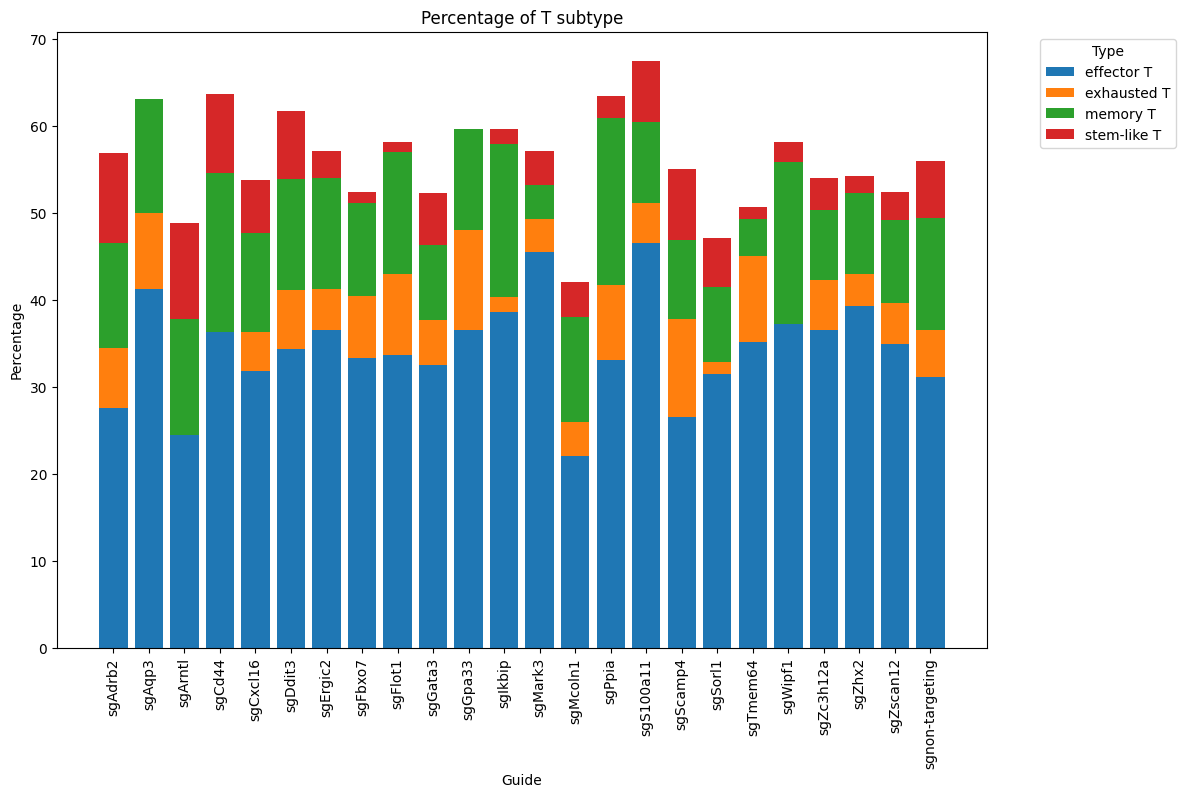

In [43]:
mask = clean_df.sum(axis=1) > 20
guide_percentage = clean_df[mask].div(count_df[mask].sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))

bottom = np.zeros(len(guide_percentage))

for column in guide_percentage.columns:
    plt.bar(guide_percentage.index, guide_percentage[column], bottom=bottom, label=column)
    bottom += guide_percentage[column]

plt.xlabel('Guide')
plt.ylabel('Percentage')
plt.title('Percentage of T subtype')
plt.xticks(rotation=90)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: >

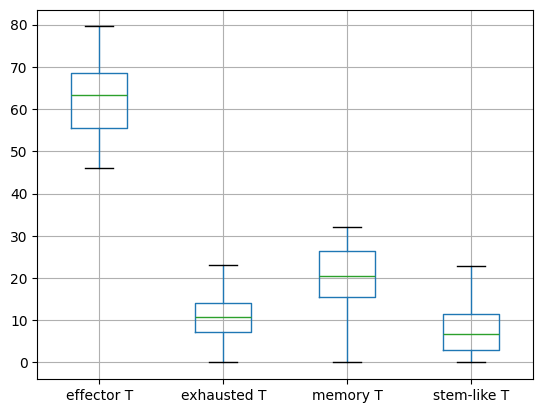

In [22]:
guide_percentage.boxplot()